In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file = "/Users/shrutim/Downloads/SeriesReport-20240201235434_9711f8.xlsx"
file_test = "/Users/shrutim/Downloads/SeriesReport-20240201235434_9711f8 copy.xlsx"

In [3]:
original_df = pd.read_excel(file_test, header= 11)
original_df.head()

/Users/shrutim/anaconda3/envs/dev/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,NaN,NaN
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,NaN,NaN
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,NaN,NaN
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,NaN,NaN
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,NaN,NaN


In [4]:
original_df = original_df.drop(['HALF1', 'HALF2', "Annual"], axis = 1)
original_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [5]:
list_years = original_df['Year']
list_months = original_df.columns.tolist()[1:]
repeated_months = []

for year in range(len(list_years)):
    repeated_months = list_months + repeated_months

cpi_values = original_df.iloc[:, 1:].values
cpi_values = cpi_values.reshape(-1)

In [6]:
history_df = pd.DataFrame({
    'year': original_df['Year'].repeat(12),
    'month': repeated_months,
    'cpi_values': cpi_values
})
history_df.head()

,year,month,cpi_values
0,1913,Jan,9.8
0,1913,Feb,9.8
0,1913,Mar,9.8
0,1913,Apr,9.8
0,1913,May,9.7


In [7]:
month_name_to_number = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Map the 'month' column to month numbers
history_df['month'] = history_df['month'].map(month_name_to_number)

history_df.head()

,year,month,cpi_values
0,1913,1,9.8
0,1913,2,9.8
0,1913,3,9.8
0,1913,4,9.8
0,1913,5,9.7


In [8]:
history_df['year_month_decimal'] = history_df['year'] + history_df['month'] / 12
history_df.head()

,year,month,cpi_values,year_month_decimal
0,1913,1,9.8,1913.083333
0,1913,2,9.8,1913.166667
0,1913,3,9.8,1913.250000
0,1913,4,9.8,1913.333333
0,1913,5,9.7,1913.416667


In [9]:
y = history_df['cpi_values']
X = history_df['year_month_decimal'].values

X = X.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_test = y_test.reset_index(drop=True)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1173.451507725449


In [10]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.8372083416814087.
The r2 is 0.8396311991995853.
The mean squared error is 1173.451507725449.
The root mean squared error is 34.25567847416613.
The standard deviation is 85.29403680892736.


In [11]:
months_year = [int(month) for month in range(1, 13)]
future_years = np.arange(2024, 2104)
futureyear_repeated = [month for month in future_years for _ in range(12)]

futuremonth_repeated = []
for year in range(len(future_years)):
    futuremonth_repeated = futuremonth_repeated + months_year

future_dates = []
for month in range(len(futureyear_repeated)):
    date = futureyear_repeated[month] + futuremonth_repeated[month]/12
    future_dates.append(date)

future_dates = np.array(future_dates)
future_dates = future_dates.reshape(-1,1)



In [12]:
new_y_pred = model.predict(future_dates)

In [13]:
future_shaped = future_dates[:, 0]
new_future_df = pd.DataFrame({'future': new_y_pred, 'date': future_shaped, 'year': futureyear_repeated})
new_future_df.head()

,future,date,year
0,221.835923,2024.083333,2024
1,222.037438,2024.166667,2024
2,222.238954,2024.250000,2024
3,222.440470,2024.333333,2024
4,222.641986,2024.416667,2024


In [14]:
annual_future_df = new_future_df.groupby('year')['future'].mean().reset_index()
annual_future_df.head()

,year,future
0,2024,222.944259
1,2025,225.362448
2,2026,227.780637
3,2027,230.198826
4,2028,232.617015


<Axes: xlabel='year'>

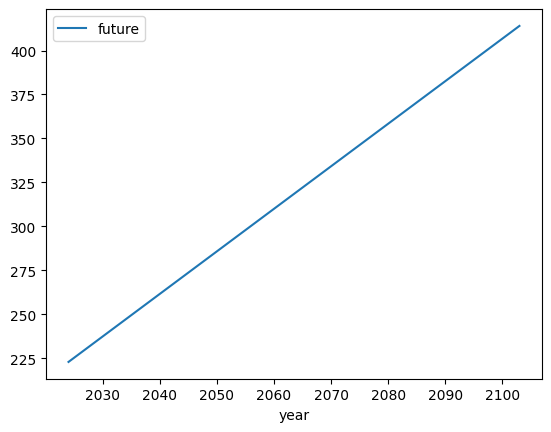

In [15]:
annual_future_df.plot(x = 'year', y = 'future')

In [18]:
annual_future_df.to_csv('/Users/shrutim/Downloads/testing_future_inflation.csv', index=False)